In [1]:
import pandas as pd
import matplotlib.pyplot as plt

bank_dataset = pd.read_csv('./exp3-new.csv')
print(bank_dataset)

       age          job marital            education  default  housing  loan  \
0       56    housemaid       1             basic.4y        0        0     0   
1       57     services       1          high.school        0        0     0   
2       37     services       1          high.school        0        1     0   
3       40       admin.       1             basic.6y        0        0     0   
4       56     services       1          high.school        0        0     1   
...    ...          ...     ...                  ...      ...      ...   ...   
41183   47      retired       1  professional.course        0        1     0   
41184   46  blue-collar       1  professional.course        0        0     0   
41185   56      retired       1    university.degree        0        1     0   
41186   44   technician       1  professional.course        0        0     0   
41187   47      retired       1  professional.course        0        1     0   

         contact month day_of_week  dur

In [2]:
from sklearn.preprocessing import LabelEncoder

# Assuming bank_dataset is your DataFrame

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each column
for column in bank_dataset.columns:
    # Check if the column datatype is object (i.e., string)
    if bank_dataset[column].dtype == 'object':
        # Use LabelEncoder to convert the string values into numeric data
        bank_dataset[column] = label_encoder.fit_transform(bank_dataset[column])

print(bank_dataset.head())

   age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        0        0     0        1      6   
2   37    7        1          3        0        1     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     1        1      6   

   day_of_week  duration  campaign  pdays  previous  poutcome  y  
0            1       261         1    999         0         1  0  
1            1       149         1    999         0         1  0  
2            1       226         1    999         0         1  0  
3            1       151         1    999         0         1  0  
4            1       307         1    999         0         1  0  


In [3]:
bank_dataset_copy = bank_dataset

mean_age = bank_dataset_copy['age'].mean()
std_age = bank_dataset_copy['age'].std()

bank_dataset_copy['age_normalized'] = (bank_dataset_copy['age'] - mean_age) / std_age

print(bank_dataset_copy[['age', 'age_normalized']].head())


   age  age_normalized
0   56        1.690550
1   57        1.794158
2   37       -0.278011
3   40        0.032815
4   56        1.690550


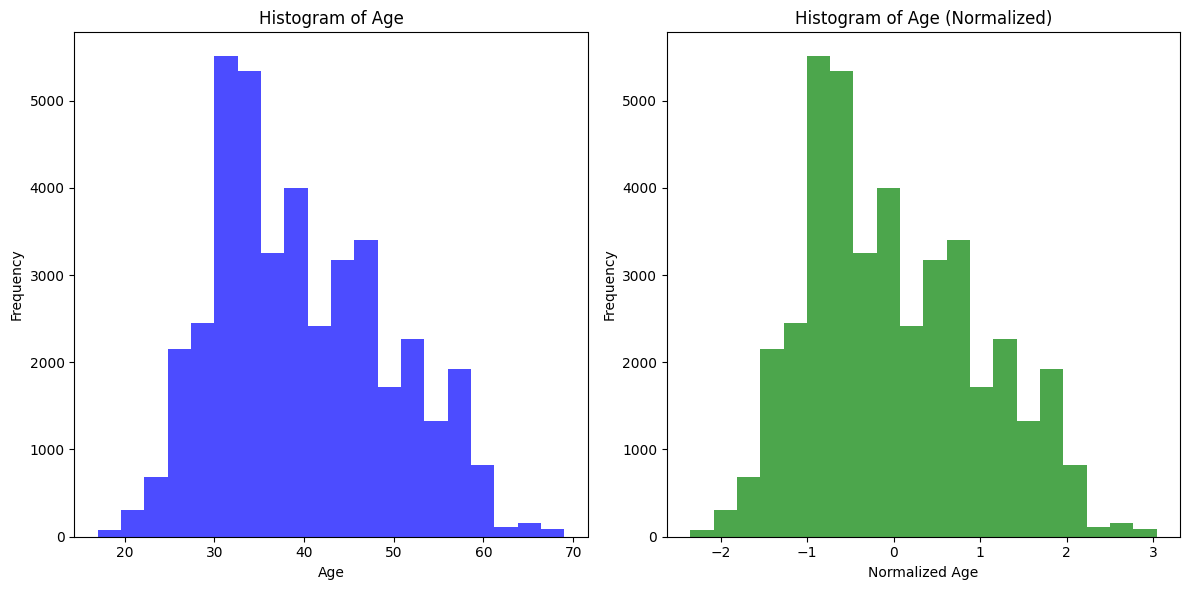

In [4]:
import matplotlib.pyplot as plt

# Plot histograms of the original 'age' attribute and the normalized 'age_normalized' attribute
plt.figure(figsize=(12, 6))

# Plot histogram of the original 'age' attribute
plt.subplot(1, 2, 1)
plt.hist(bank_dataset_copy['age'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plot histogram of the normalized 'age_normalized' attribute
plt.subplot(1, 2, 2)
plt.hist(bank_dataset_copy['age_normalized'], bins=20, color='green', alpha=0.7)
plt.title('Histogram of Age (Normalized)')
plt.xlabel('Normalized Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [5]:
bank_dataset_copy.to_csv('exp4.csv', header = True, index = False)